# **Task 6**

## **Prediction using Decision Tree Algorithm**

### Workshop - Decision Trees

* This workshop deals with understanding the working of decision trees.

### Problems
* Create the Decision Tree classifier and visualize it graphically.
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
### GRIP THE SPARKS FOUNDATION ###
# Author: Muhammet Varlı

In [14]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# 1. Data Read

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Let's have an overview of the data set
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
df['target'] = iris.target
df['species'] = df.target.apply(lambda x: iris.target_names[x])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

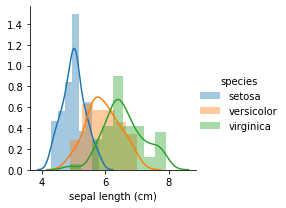

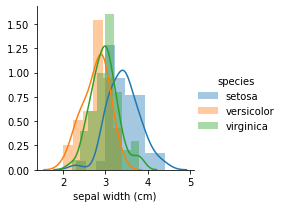

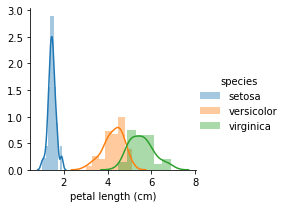

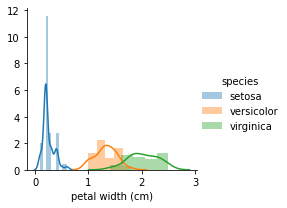

In [8]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal length (cm)").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal width (cm)").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal length (cm)").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal width (cm)").add_legend()
plt.show()

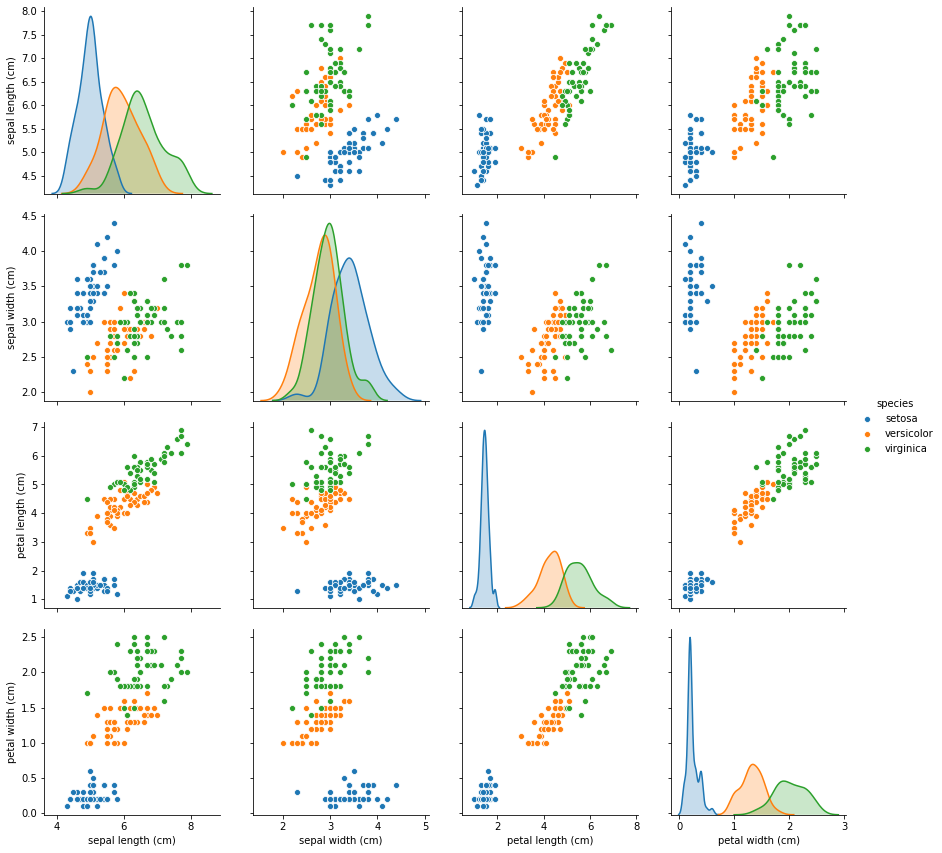

In [9]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df.drop("target", axis=1), hue="species", size=3)

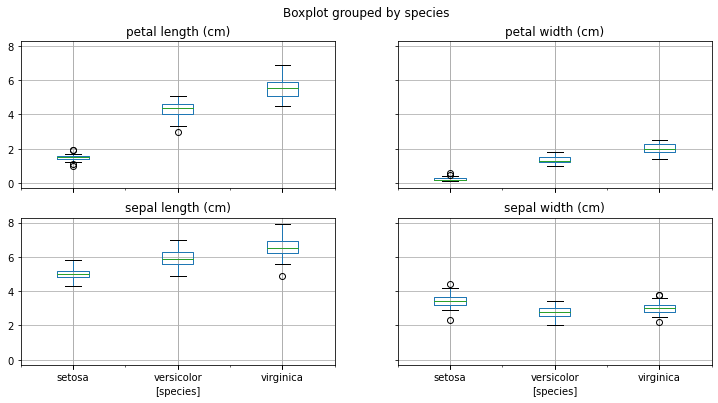

In [10]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
df.drop("target", axis=1).boxplot(by="species", figsize=(12, 6));

In [11]:
X = df.drop(['target','species'], axis=1)

### Now let us define the Decision Tree Algorithm

In [16]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred = dtree.predict(X) # tahmin işlemi test seti üzerinden

In [22]:
accuracy_score(y, y_pred) # accuracy değeri test seti üzerinden

1.0

### Let us visualize the Decision Tree to understand it better.



In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

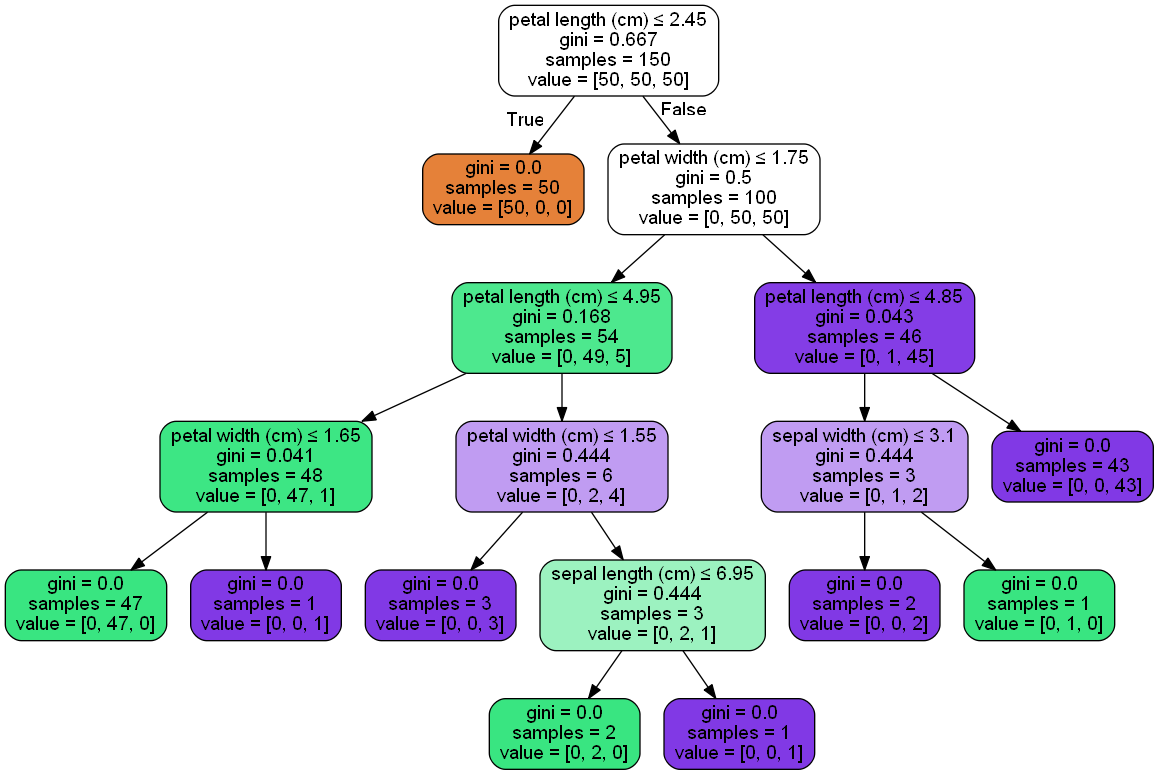

In [17]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [34]:
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
y_pred2 = decision.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred2) 

1.0